In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Input parameters
porosity = float(input("Enter Porosity: "))
K = float(input("Enter Permeability (md): "))
h = float(input("Enter pay zone thickness (Feet): "))
P = float(input("Enter Reservoir Pressure (psi): "))
Pb = float(input("Enter Bubble Point Pressure (psi): "))
Bo = float(input("Enter Formation Volume Factor: "))
Viscosity = float(input("Enter fluid viscosity (cp): "))
A = float(input("Enter Drainage Area (Acres): "))
rw = float(input("Enter Wellbore radius (ft): "))
S = float(input("Enter Skin Factor: "))

Enter Porosity: .19
Enter Permeability (md): 8.3
Enter pay zone thickness (Feet): 53
Enter Reservoir Pressure (psi): 5651
Enter Bubble Point Pressure (psi): 5651
Enter Formation Volume Factor: 1.1
Enter fluid viscosity (cp): 1.7
Enter Drainage Area (Acres): 640
Enter Wellbore radius (ft): .328
Enter Skin Factor: 0


In [9]:
# Calculate productivity index J
re = np.sqrt(43560 * A / np.pi)  # Using np.pi for accuracy
J = (K * h) / (141.2 * Bo * Viscosity * (np.log(re / rw) - 0.75 + S))
print(f"Productivity Index J: {J:.2f} STB/day/psi")


Productivity Index J: 0.20 STB/day/psi


In [10]:
# Check reservoir type and compute Q_max
if P > Pb:
    # Undersaturated reservoir
    Qb = J * (P - Pb)
    Qmax = Qb + (J * Pb / 1.8)
    print(f"Qmax (undersaturated reservoir): {Qmax:.2f} STB/day")
else:
    # Saturated reservoir
    Qmax = J * P / 1.8
    print(f"Qmax (saturated reservoir): {Qmax:.2f} STB/day")


Qmax (saturated reservoir): 625.34 STB/day


In [11]:
# Generate Pwf values from 0 to P
pwf_values = np.linspace(0, P, 100)
flow_rates = []

for pwf in pwf_values:
    if P > Pb:
        # Undersaturated reservoir
        if pwf >= Pb:
            q = J * (P - pwf)
        else:
            q = Qb + (J * Pb / 1.8) * (1 - 0.2 * (pwf / Pb) - 0.8 * (pwf / Pb)**2)
    else:
        # Saturated reservoir
        q = Qmax * (1 - 0.2 * (pwf / P) - 0.8 * (pwf / P)**2)
    flow_rates.append(q)

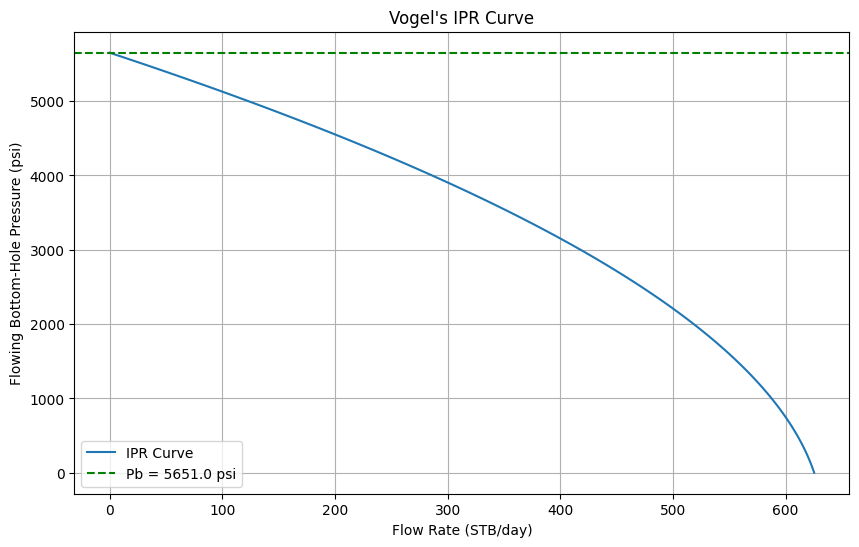

In [13]:
# Plot IPR curve
plt.figure(figsize=(10, 6))
plt.plot(flow_rates, pwf_values, label="IPR Curve")
plt.xlabel("Flow Rate (STB/day)")
plt.ylabel("Flowing Bottom-Hole Pressure (psi)")
plt.title("Vogel's IPR Curve")

# Add a horizontal dashed line at Pb
plt.axhline(y=Pb, color='green', linestyle='--', linewidth=1.5, label=f'Pb = {Pb:.1f} psi')
plt.legend()
plt.grid(True)
plt.show()